## TASK-4 
# Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

## Import necessary libraries

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

## Define column names and load the dataset

In [78]:
col_names = ['ID', 'Entity', 'Sentiments', 'Contest']
df = pd.read_csv('twitter_training.csv', names=col_names)

In [79]:
df.head()

,ID,Entity,Sentiments,Contest
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [80]:
df.tail()

,ID,Entity,Sentiments,Contest
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [81]:
df.shape

(74682, 4)

In [82]:
df.describe

<bound method NDFrame.describe of          ID       Entity Sentiments  \
0      2401  Borderlands   Positive   
1      2401  Borderlands   Positive   
2      2401  Borderlands   Positive   
3      2401  Borderlands   Positive   
4      2401  Borderlands   Positive   
...     ...          ...        ...   
74677  9200       Nvidia   Positive   
74678  9200       Nvidia   Positive   
74679  9200       Nvidia   Positive   
74680  9200       Nvidia   Positive   
74681  9200       Nvidia   Positive   

                                                 Contest  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that

In [83]:
df.isnull().sum()

ID              0
Entity          0
Sentiments      0
Contest       686
dtype: int64

In [84]:
df.duplicated().sum()

np.int64(2700)

In [85]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [86]:
df.shape

(71982, 4)

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [88]:
df['polarity'] = df['Sentiments'].apply(get_sentiment)

In [89]:
df['sentiment'] = df['polarity'].apply(lambda p: 'Positive' if p > 0 else ('Negative' if p < 0 else 'Neutral'))

In [90]:
sentiment_counts=df['Sentiments'].value_counts()
sentiment_counts

Sentiments
Negative      21787
Positive      19811
Neutral       17800
Irrelevant    12584
Name: count, dtype: int64

In [ ]:
## Bar chart

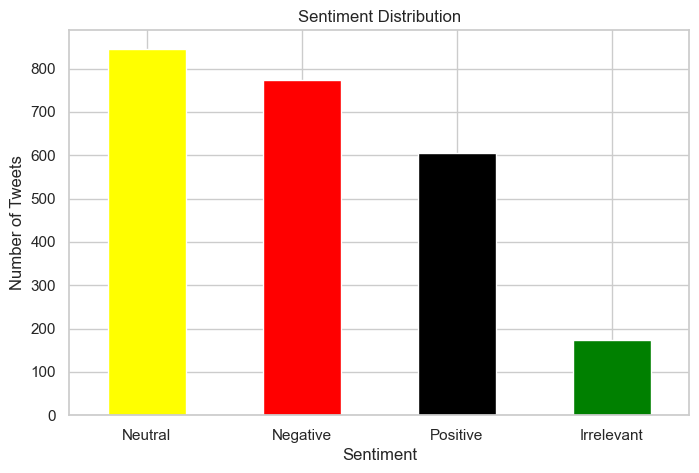

In [114]:
sentiment_series = pd.Series(sentiment_counts)
plt.figure(figsize=(8,5))
sentiment_series.plot(kind='bar', color=['yellow','red','black','green'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()


##  Pie Chart of Sentiment Distribution

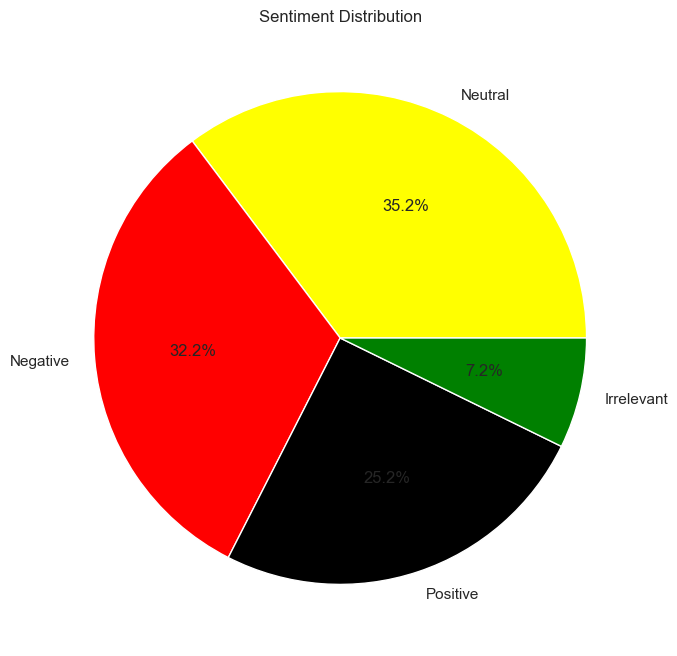

In [119]:
sentiment_series = pd.Series(sentiment_counts)
plt.figure(figsize=(8,8))
sentiment_series.plot(kind='pie', autopct='%1.1f%%', colors=['yellow', 'red', 'black', 'green'], legend=False)
plt.title('Sentiment Distribution')
plt.ylabel('')  # Hide the y-label to avoid clutter
plt.show()

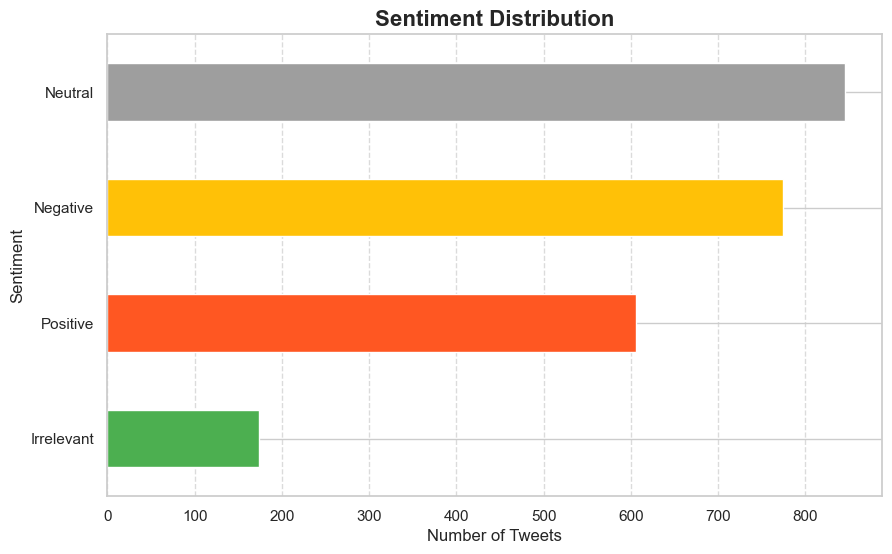

In [106]:
sentiment_df = pd.Series(sentiment_counts)
plt.figure(figsize=(10,6), dpi=100)  
sentiment_df.sort_values().plot(kind='barh', color=['#4CAF50', '#FF5722', '#FFC107', '#9E9E9E'])  
plt.title('Sentiment Distribution', fontsize=16, weight='bold')  
plt.xlabel('Number of Tweets')
plt.ylabel('Sentiment')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()